In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('data/kategorisasi-aspek/priority_10k_labelled.csv')
df_test = pd.read_csv('data/kategorisasi-aspek/test.csv')
print(df.shape)
df.head()

(19024, 4)


,reviews,category_sentiment,category,sentiment
0,Kotor berdebu. Saya tdk berhenti bersin ketika...,wifi_P1-neg,wifi_P1,neg
1,Kotor berdebu. Saya tdk berhenti bersin ketika...,kebersihan-neg,kebersihan,neg
2,kamar ada semutnya. kamar mandi bermasalah. bu...,kebersihan-neg,kebersihan,neg
3,"Kamar mandi bau, airnya bau",bau_P1-neg,bau_P1,neg
4,"tak sesuai espektasi, kamar sempit, pintu kama...",service-neg,service,neg


In [40]:
df.describe()

,reviews,category_sentiment,category,sentiment
count,19024,19024,18476,19024
unique,9827,21,10,3
top,#NAME?,kebersihan-neg,kebersihan,neg
freq,39,3093,4006,14555


In [41]:
a = df[df.sentiment != 'ignored']
a[['reviews', 'category']].drop_duplicates().describe()

,reviews,category
count,18224,18224
unique,9284,10
top,#NAME?,kebersihan
freq,10,3926


In [28]:
print(df_test.shape)
df_test.head()

(996, 4)


,review,category_sentiment,category,sentiment
0,"Pelayanannya memuaskan, dan sangat ramah, kama...",service-pos,service,pos
1,"Pelayanannya memuaskan, dan sangat ramah, kama...",linen_P1-pos,linen_P1,pos
2,"Pelayanannya memuaskan, dan sangat ramah, kama...",kebersihan-pos,kebersihan,pos
3,"Pelayanannya memuaskan, dan sangat ramah, kama...",wifi_P1-neg,wifi_P1,neg
4,"hanya AC nya saja yang agak berisik, pelayanan...",service-pos,service,pos


## EDA

In [4]:
print("Bentuk data awal : ",df.shape)
print("Jumlah data duplicate: ", df[df.duplicated()].shape)
print("There is duplicate data") if df[df.duplicated()].shape[0] - df.shape[0] != 0 else print("No duplicate data")

Bentuk data awal :  (19024, 4)
Jumlah data duplicate:  (238, 4)
There is duplicate data


### Check number of nan

In [5]:
df.isnull().sum()

reviews                 0
category_sentiment      0
category              548
sentiment               0
dtype: int64

In [6]:
get_nans_row = lambda df: df[df.isnull().any(axis=1)]
nans_row = get_nans_row(df)
print(nans_row.shape)
nans_row

(548, 4)


,reviews,category_sentiment,category,sentiment
46,"The TV should be upgrade, and also the toileta...",-ignored-,NaN,ignored
51,better find another hotel.. unless you just wa...,-ignored-,NaN,ignored
86,I arrived very late due to long delayed. It wa...,-ignored-,NaN,ignored
90,"Dirty toilet, unhelpful staff, towel never cha...",-ignored-,NaN,ignored
215,Kamarnya butuh perbaikan.. dinding kamar dan p...,-ignored-,NaN,ignored
323,Overall staying in this hotel is great just on...,-ignored-,NaN,ignored
331,Bath room not shine up soap leaking; brown wat...,-ignored-,NaN,ignored
346,Low quality of Wi-Fi. Clean bedroom. Bathroom ...,-ignored-,NaN,ignored
379,"Cannot connect to wifi, they provides kitchen ...",-ignored-,NaN,ignored
465,The air conditioner is not working and the roo...,-ignored-,NaN,ignored


In [7]:
df['reviews'][18992]

'Kamarnya luas. Bersih. Hanya untuk tempat sampah nya, plastiknya diganti jg, jadi jangan cuma isinya aja yang d buang. Selain itu. Ok kok'

In [8]:
df['reviews'][17953]

'Kamar mandi jelek banget, termasuk mahal fasilitasnya tidak sesuai dengan harga sewa per malam.'

In [9]:
# We can fill category that have nan value with "ignored"
df.fillna("ignored", inplace=True)

### Check possible value each column

In [10]:
df.category_sentiment.unique().tolist()

['wifi_P1-neg',
 'kebersihan-neg',
 'bau_P1-neg',
 'service-neg',
 'linen_P1-neg',
 'ac_P1-neg',
 'sunrise_meal_P1-pos',
 'general-pos',
 'air_panas_P1-neg',
 'tv_P1-neg',
 'service-pos',
 'linen_P1-pos',
 'kebersihan-pos',
 'ac_P1-pos',
 'air_panas_P1-pos',
 'sunrise_meal_P1-neg',
 '-ignored-',
 'wifi_P1-pos',
 'tv_P1-pos',
 'bau_P1-pos',
 'general-neg']

In [11]:
df.category.unique().tolist()

['wifi_P1',
 'kebersihan',
 'bau_P1',
 'service',
 'linen_P1',
 'ac_P1',
 'sunrise_meal_P1',
 'general',
 'air_panas_P1',
 'tv_P1',
 'ignored']

In [12]:
df.sentiment.unique().tolist()

['neg', 'pos', 'ignored']

In [13]:
print("Jumlah Review Unik : ",len(df.reviews.unique().tolist()))

Jumlah Review Unik :  9827


### Check Imbalance data

neg        14555
pos         3921
ignored      548
Name: sentiment, dtype: int64


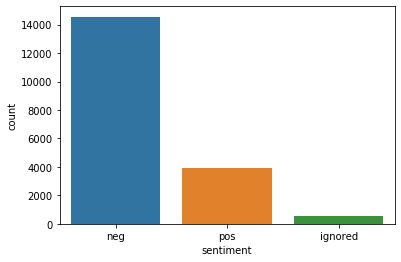

In [14]:
print(df['sentiment'].value_counts())
sns.countplot(x='sentiment', data=df)

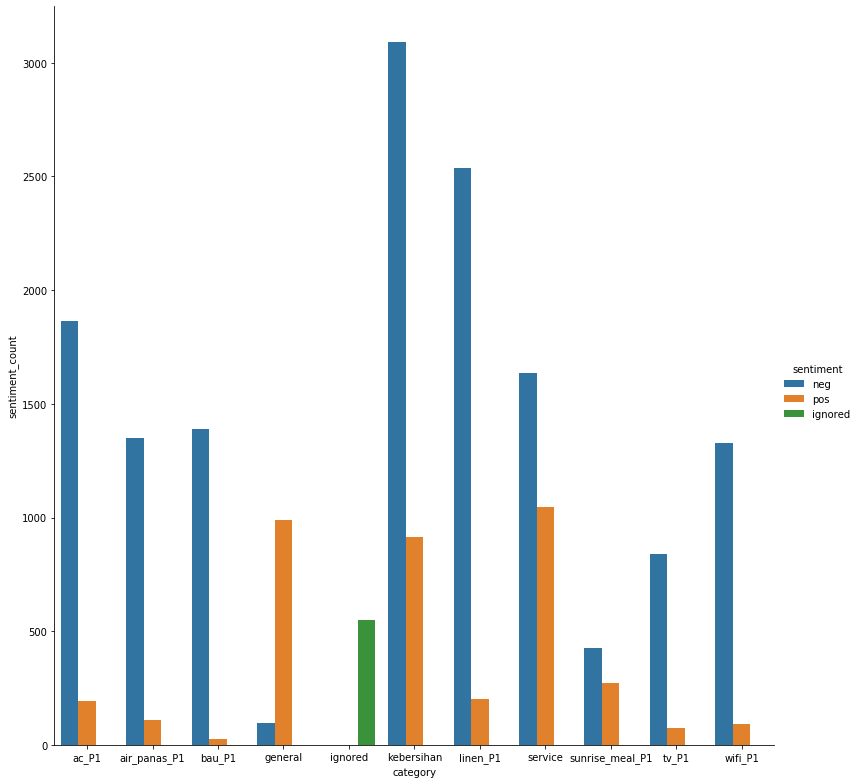

In [15]:
data_grouped = df.groupby('category')['sentiment'].value_counts().to_frame()
data_grouped = data_grouped.add_suffix('_count').reset_index()
sns.catplot(x="category", y="sentiment_count", hue="sentiment", kind="bar", data=data_grouped, height=11)

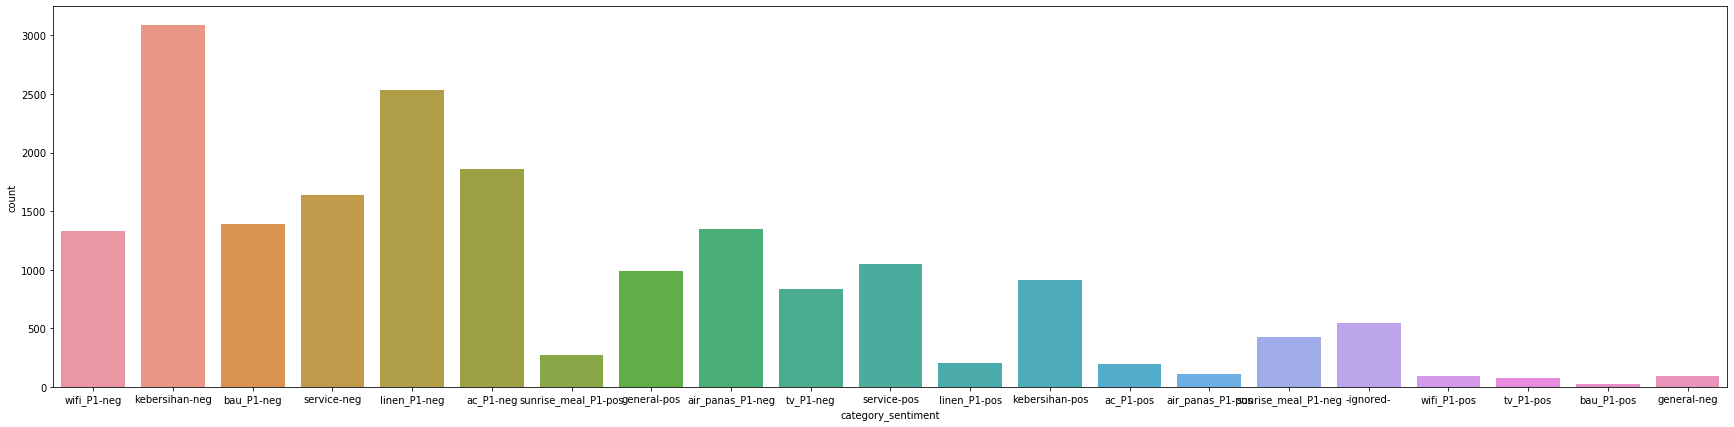

In [18]:
fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(7)
ax = sns.countplot(x='category_sentiment', data=df)

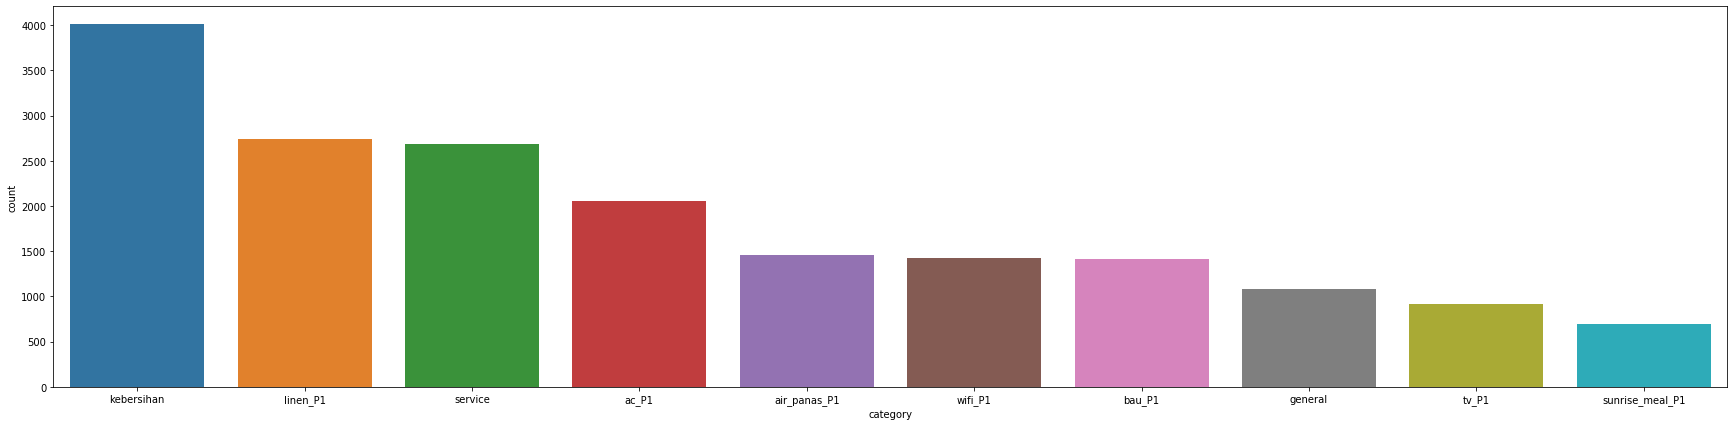

In [42]:
fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(7)
ax = sns.countplot(x='category', data=a, order = df['category'].value_counts().index)
ax.get_figure().savefig("test.png")

### Check multi labelled data

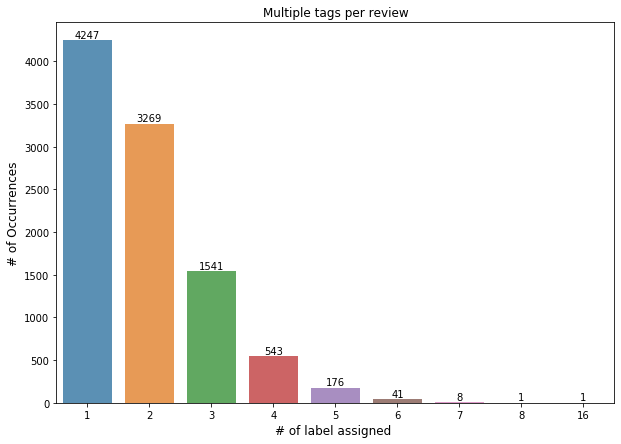

In [15]:
droppedDuplicate = df.drop_duplicates()
groupedByViews = droppedDuplicate['reviews'].value_counts().to_frame()
labelPerReview = groupedByViews['reviews'].value_counts()
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(7)
plt.title("Multiple tags per review")


ax = ax = sns.barplot(labelPerReview.index, labelPerReview.values, alpha=0.8)
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of label assigned ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = labelPerReview.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')